In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

from sklearn import  linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error


## Preprocesamiento

In [2]:
data = pd.read_csv('../data/final/clusterize_data.csv',index_col=0)

print('\nClustericed Data\n')
display(data)


Clustericed Data



,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap,cluster,country_name
0,0,0.0,6.150798e+05,3.932711e+07,3.537290e+11,1564.009628,8994.534192,2,Argentina
1,1,0.0,2.822529e+06,1.868875e+08,1.371976e+12,1510.282288,7341.184771,2,Brazil
2,2,1.0,2.971391e+03,3.660920e+05,1.029916e+10,811.651430,28132.716608,3,Brunei Darussalam
3,3,1.0,5.220874e+05,3.271917e+07,1.210058e+12,1595.662239,36983.153132,1,Canada
4,4,0.0,3.962717e+05,4.289250e+07,2.008953e+11,923.871562,4683.693004,2,Colombia
5,5,0.0,1.029976e+05,4.340064e+06,4.379259e+10,2373.180792,10090.308666,0,Croatia
6,6,0.0,1.198630e+05,1.407933e+07,5.506756e+10,851.340264,3911.234285,2,Ecuador
7,7,1.0,1.020574e+05,5.291289e+06,2.043199e+11,1928.782015,38614.389310,1,Finland
8,8,1.0,1.853636e+06,8.190427e+07,2.963807e+12,2263.174335,36186.237399,1,Germany
9,9,0.0,2.740060e+05,1.006958e+07,1.012285e+11,2721.125571,10052.905247,0,Hungary


In [3]:
data_by_year = pd.read_csv('../data/final/data_rows.csv',index_col=0).join(data[['country_name','cluster']].set_index('country_name'),on='Country Name')

data_by_year['deaths_rate'] = data_by_year['deaths']/data_by_year['populantion']
data_by_year['pib_per_cap'] = data_by_year['pib']/data_by_year['populantion']

print('\nData by year\n')
display(data_by_year)


Data by year



,Country Name,Sanidad,year,deaths,populantion,pib,cluster,deaths_rate,pib_per_cap
0,Argentina,0,1995,663472,34828170,2.580318e+11,2,0.019050,7408.708238
1,Argentina,0,1996,664675,35246374,2.721498e+11,2,0.018858,7721.354543
2,Argentina,0,1997,541820,35657429,2.928590e+11,2,0.015195,8213.127200
3,Argentina,0,1998,560360,36063459,2.989482e+11,2,0.015538,8289.505729
4,Argentina,0,1999,579086,36467218,2.835230e+11,2,0.015880,7774.736203
...,...,...,...,...,...,...,...,...,...
455,United States of America,0,2013,5193986,315993715,1.678485e+13,4,0.016437,53117.667850
456,United States of America,0,2014,5252836,318301008,1.752716e+13,4,0.016503,55064.744548
457,United States of America,0,2015,5425260,320635163,1.822470e+13,4,0.016920,56839.381774
458,United States of America,0,2016,5488496,322941311,1.871496e+13,4,0.016995,57951.584082


## Regresión múltiple

In [4]:
### 1. Regresion multiple teniendo en cuenta todos los atributos

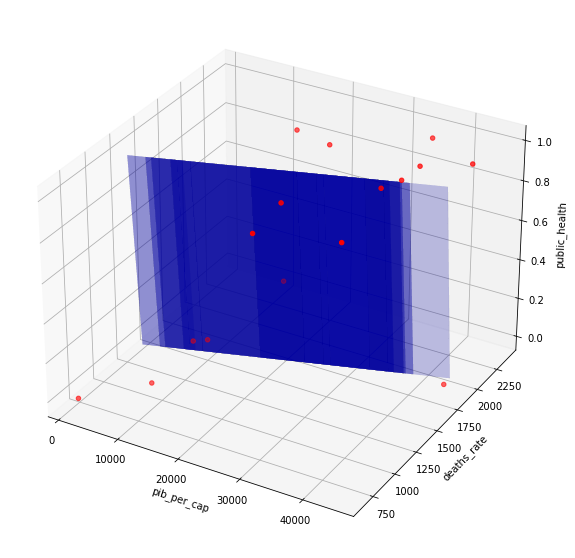

Score (R2):  -0.16395315544497802
slope: [ 1.29761425e-02 -1.00170400e+02]  intercept: 1312.722247909453


In [5]:
# Comienzo definiendo las variables que usaremos para predecir (en este caso todas) 
# y la variable objetivo (en este caso: “SalePrice”, el precio de venta).
X_multiple = data[['pib_per_cap','public_health']]
y_multiple = data[ 'deaths_rate']

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2,random_state=2020)

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()


lr_multiple.fit(X_train, y_train)

Y_pred_train = lr_multiple.predict(X_train)
Y_pred_test = lr_multiple.predict(X_test)

# 3D plot
fig = plt.figure(0)

xx, yy = np.meshgrid(X_multiple[X_train.columns[0]], X_multiple[X_train.columns[1]])
z = (lr_multiple.coef_[0] * xx  + lr_multiple.coef_[1] * yy + lr_multiple.intercept_)

ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(X_train[X_train.columns[0]], y_train, X_train[X_train.columns[1]], color='r', label='Actual data')

ax.plot_surface(xx, z, yy, alpha=0.03, color='b')

ax.set_xlabel('pib_per_cap')
ax.set_ylabel('deaths_rate')
ax.set_zlabel('public_health')

fig.set_figwidth(10) 
fig.set_figheight(10) 
plt.show()

#calculo metricas
score = lr_multiple.score(X_test, y_test)
print("Score (R2): ",str(score))
print('slope:', lr_multiple.coef_,' intercept:',lr_multiple.intercept_)

In [6]:
#analisis de restos para poder entender mejor la calidad del modelo
media = y_test.mean()
Y_pred_test = lr_multiple.predict(X_test)
SCT = 0
for y in y_test:
  SCT += (y - media)**2

SCE = 0
for y,pred in zip(y_test,Y_pred_test):
  SCE += (y - pred)**2

SCR = 0
for pred in Y_pred_test:
  SCR += (pred - media)**2

print("SCT: ",round(SCT))
print("SCE: ",round(SCE))
print("SCR: ",round(SCR))

SCT:  3170385.0
SCE:  3690180.0
SCR:  276495.0


In [7]:
pred_total =lr_multiple.predict(X_multiple)
print('Los Residuos ordinarios medio son: ',mean_absolute_error(y_multiple, pred_total))
print('\nLos Residuos ordinarios maximos son: ',max_error(y_multiple, pred_total))
print('\nEl error cuadratico medio es: ',mean_squared_error(y_multiple, pred_total))

Los Residuos ordinarios medio son:  493.1301807740016

Los Residuos ordinarios maximos son:  1277.955392159666

El error cuadratico medio es:  371567.69200093974


## Regresion simple

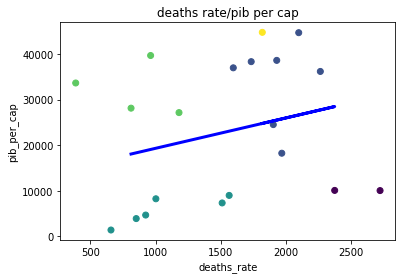

Score:  -0.37879935624359784
Pearson r:  0.18674353019577186


In [8]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(data['deaths_rate'], axis=1), np.expand_dims(data['pib_per_cap'], axis=1), test_size=0.2, random_state=5)

#creo el modelo
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

#Dibujo los resultados
ax = plt.scatter(data['deaths_rate'], data['pib_per_cap'],  c=data['cluster'])
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.xlabel('deaths_rate')
plt.ylabel('pib_per_cap')
plt.title('deaths rate/pib per cap')
plt.show()

#Calculo las metricas
x = regr.score(X_test, y_test)
print("Score: ",str(x))
print("Pearson r: ",data['deaths_rate'].corr(data['pib_per_cap'], method='pearson'))


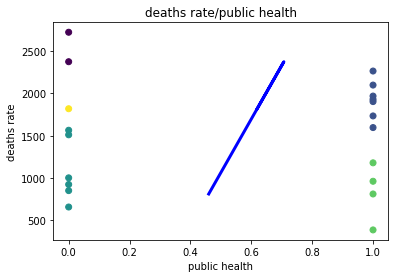

Score:  -0.3099009201241145
Pearson r:  0.030813327933816716


In [9]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(data['deaths_rate'], axis=1), np.expand_dims(data['public_health'], axis=1), test_size=0.2, random_state=5)

#creo el modelo
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

#Dibujo los resultados
plt.scatter( data['public_health'], data['deaths_rate'],  c=data['cluster'])
plt.plot( pred, X_test, color='blue', linewidth=3)

plt.xlabel('public health')
plt.ylabel('deaths rate')
plt.title('deaths rate/public health')
plt.show()

#Calculo las metricas
x = regr.score(X_test, y_test)
print("Score: ",str(x))
print("Pearson r: ",data['deaths_rate'].corr(data['public_health'], method='pearson'))


## Estudio de los clusters



 Cluster2


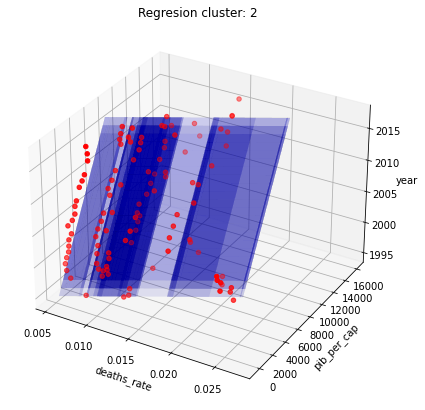

Score:  0.4467274335031678
Pearson r:  0.3614876318762464
slope: [[4.20363807e+05 3.22998880e+02]]  intercept: [-646984.90865293]


,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap,cluster,country_name
0,0,0.0,6.150798e+05,3.932711e+07,3.537290e+11,1564.009628,8994.534192,2,Argentina
1,1,0.0,2.822529e+06,1.868875e+08,1.371976e+12,1510.282288,7341.184771,2,Brazil
4,4,0.0,3.962717e+05,4.289250e+07,2.008953e+11,923.871562,4683.693004,2,Colombia
6,6,0.0,1.198630e+05,1.407933e+07,5.506756e+10,851.340264,3911.234285,2,Ecuador
13,13,0.0,1.082080e+06,1.079857e+08,8.913276e+11,1002.058910,8254.129758,2,Mexico
14,14,0.0,3.631926e+04,5.521587e+06,7.746228e+09,657.768459,1402.898759,2,Nicaragua




 Cluster3


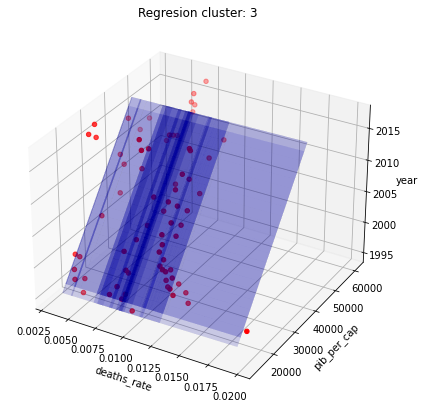

Score:  0.4880713045488885
Pearson r:  -0.3098969220647133
slope: [[44737.46211955  1410.35959384]]  intercept: [-2799409.80413194]


,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap,cluster,country_name
2,2,1.0,2971.391304,3.660920e+05,1.029916e+10,811.651430,28132.716608,3,Brunei Darussalam
10,10,1.0,83656.739130,7.092978e+06,1.926407e+11,1179.430361,27159.353734,3,Israel
12,12,1.0,10199.652174,2.633605e+06,8.863249e+10,387.288635,33654.438198,3,Kuwait
15,15,1.0,44230.260870,4.599109e+06,1.825075e+11,961.713763,39683.223425,3,Singapore




 Cluster1


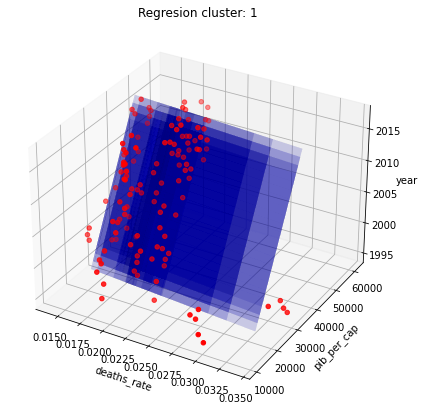

Score:  0.11523381906127339
Pearson r:  -0.23661007206368254
slope: [[-215174.75390983     977.69942363]]  intercept: [-1922551.29833417]


,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap,cluster,country_name
3,3,1.0,5.220874e+05,3.271917e+07,1.210058e+12,1595.662239,36983.153132,1,Canada
7,7,1.0,1.020574e+05,5.291289e+06,2.043199e+11,1928.782015,38614.389310,1,Finland
8,8,1.0,1.853636e+06,8.190427e+07,2.963807e+12,2263.174335,36186.237399,1,Germany
11,11,1.0,2.204826e+06,1.272223e+08,4.877185e+12,1733.050432,38335.938166,1,Japan
16,16,1.0,3.974396e+04,2.019970e+06,3.686103e+10,1967.551482,18248.301597,1,Slovenia
17,17,1.0,8.325672e+05,4.376309e+07,1.073352e+12,1902.441546,24526.427617,1,Spain
18,18,1.0,1.933877e+05,9.220310e+06,4.120606e+11,2097.410421,44690.535516,1,Sweden




 Cluster0


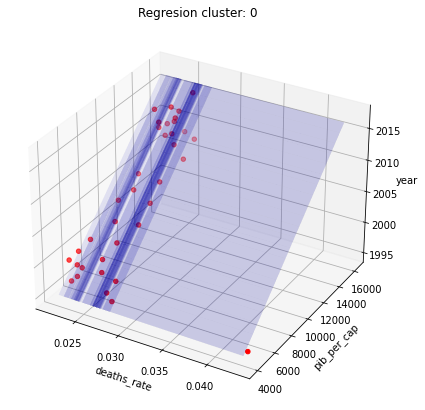

Score:  0.717461182025179
Pearson r:  -0.12575532839377523
slope: [[-7596.53476666   531.26729935]]  intercept: [-1055559.56801499]


,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap,cluster,country_name
5,5,0.0,102997.565217,4.340064e+06,4.379259e+10,2373.180792,10090.308666,0,Croatia
9,9,0.0,274005.956522,1.006958e+07,1.012285e+11,2721.125571,10052.905247,0,Hungary




 Cluster4


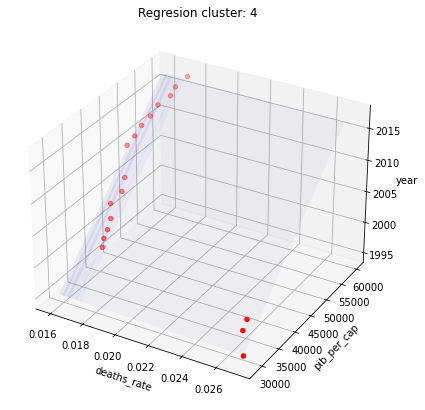

Score:  0.9690973074697852
Pearson r:  -0.680121765105391
slope: [[-45598.96266672   1359.89202351]]  intercept: [-2682988.29129335]


,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap,cluster,country_name
19,19,0.0,5.410490e+06,2.975849e+08,1.332148e+13,1818.133331,44765.309905,4,United States of America


In [10]:
#Regresion multiple dividiendo el dataset por los clusters
for cl in data['cluster'].unique():
    print("\n\n Cluster" + str(cl))
    cluster = data_by_year.where(data_by_year['cluster']==cl).dropna()
    
    #Creo los datasets de train/test
    X = cluster[['deaths_rate','year']];
    Y = np.expand_dims(cluster['pib_per_cap'], axis=1);
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2020)
    
    #Defino el algoritmo a utilizar
    lr_multiple = linear_model.LinearRegression()
    lr_multiple.fit(X_train, y_train)
    pred = lr_multiple.predict(X_train)

    #Dibujo los resultados
    fig = plt.figure(cl+1)
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(X_train[X_train.columns[0]], y_train, X_train[X_train.columns[1]], color='r', label='Actual data')
    
    
    xx, yy = np.meshgrid(cluster[X_train.columns[0]], cluster[X_train.columns[1]])[0:10]
    z = (lr_multiple.coef_[0][0] * xx  + lr_multiple.coef_[0][1] * yy + lr_multiple.intercept_)
   
    ax.plot_surface(xx, z, yy, alpha=0.03, color='b')
    
    ax.set_xlabel('deaths_rate')
    ax.set_ylabel('pib_per_cap')
    ax.set_zlabel('year')
    plt.title("Regresion cluster: " + str(cl));
    
    fig.set_figwidth(7) 
    fig.set_figheight(7) 
    
    plt.show()

    #calculo las metricas
    score = lr_multiple.score(X_test, y_test)
    print("Score: ",str(score))
    print("Pearson r: ",cluster[X_train.columns[0]].corr(cluster['pib_per_cap'], method='pearson'))
    print('slope:', lr_multiple.coef_,' intercept:',lr_multiple.intercept_)
    display(data[data['cluster']== cl].dropna())



 Sanidad publica: False


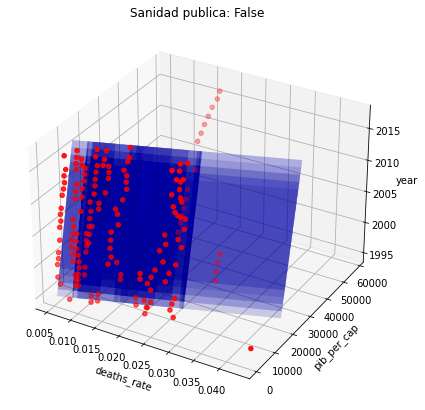

Score:  0.16758372388524967
Pearson r:  0.2767545239369145
slope: [[5.43533948e+05 4.51747271e+02]]  intercept: [-903682.34974419]


,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap,cluster,country_name
0,0,0.0,6.150798e+05,3.932711e+07,3.537290e+11,1564.009628,8994.534192,2,Argentina
1,1,0.0,2.822529e+06,1.868875e+08,1.371976e+12,1510.282288,7341.184771,2,Brazil
4,4,0.0,3.962717e+05,4.289250e+07,2.008953e+11,923.871562,4683.693004,2,Colombia
5,5,0.0,1.029976e+05,4.340064e+06,4.379259e+10,2373.180792,10090.308666,0,Croatia
6,6,0.0,1.198630e+05,1.407933e+07,5.506756e+10,851.340264,3911.234285,2,Ecuador
9,9,0.0,2.740060e+05,1.006958e+07,1.012285e+11,2721.125571,10052.905247,0,Hungary
13,13,0.0,1.082080e+06,1.079857e+08,8.913276e+11,1002.058910,8254.129758,2,Mexico
14,14,0.0,3.631926e+04,5.521587e+06,7.746228e+09,657.768459,1402.898759,2,Nicaragua
19,19,0.0,5.410490e+06,2.975849e+08,1.332148e+13,1818.133331,44765.309905,4,United States of America




 Sanidad publica: True


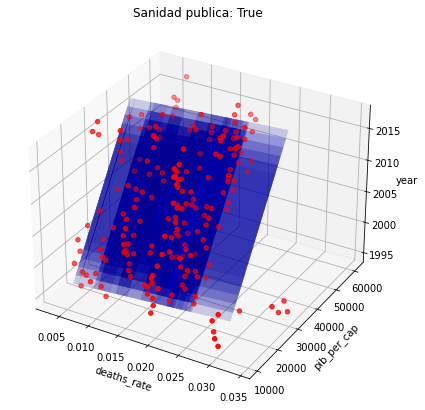

Score:  0.38702443520867214
Pearson r:  -0.05703071277123917
slope: [[177835.84951458   1242.85090728]]  intercept: [-2463257.86694929]


,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap,cluster,country_name
2,2,1.0,2.971391e+03,3.660920e+05,1.029916e+10,811.651430,28132.716608,3,Brunei Darussalam
3,3,1.0,5.220874e+05,3.271917e+07,1.210058e+12,1595.662239,36983.153132,1,Canada
7,7,1.0,1.020574e+05,5.291289e+06,2.043199e+11,1928.782015,38614.389310,1,Finland
8,8,1.0,1.853636e+06,8.190427e+07,2.963807e+12,2263.174335,36186.237399,1,Germany
10,10,1.0,8.365674e+04,7.092978e+06,1.926407e+11,1179.430361,27159.353734,3,Israel
11,11,1.0,2.204826e+06,1.272223e+08,4.877185e+12,1733.050432,38335.938166,1,Japan
12,12,1.0,1.019965e+04,2.633605e+06,8.863249e+10,387.288635,33654.438198,3,Kuwait
15,15,1.0,4.423026e+04,4.599109e+06,1.825075e+11,961.713763,39683.223425,3,Singapore
16,16,1.0,3.974396e+04,2.019970e+06,3.686103e+10,1967.551482,18248.301597,1,Slovenia
17,17,1.0,8.325672e+05,4.376309e+07,1.073352e+12,1902.441546,24526.427617,1,Spain


In [11]:
#Regresion multiple dividiendo el dataset por sanidad publica/privada
for cl in data['public_health'].unique():
    print("\n\n Sanidad publica: " + str(cl==1))
    cluster = data_by_year.where(data_by_year['Sanidad']==cl).dropna()
    
    #Creo los datasets de train/test
    X = cluster[['deaths_rate','year']];
    Y = np.expand_dims(cluster['pib_per_cap'], axis=1);
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2020)
    
    #Defino el algoritmo a utilizar
    lr_multiple = linear_model.LinearRegression()
    lr_multiple.fit(X_train, y_train)
    pred = lr_multiple.predict(X_train)

    #Dibujo los resultados
    fig = plt.figure(cl+1)
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(X_train[X_train.columns[0]], y_train, X_train[X_train.columns[1]], color='r', label='Actual data')
    
    
    xx, yy = np.meshgrid(cluster[X_train.columns[0]], cluster[X_train.columns[1]])[0:10]
    z = (lr_multiple.coef_[0][0] * xx  + lr_multiple.coef_[0][1] * yy + lr_multiple.intercept_)

    fig.set_figwidth(7) 
    fig.set_figheight(7)     
    
    ax.plot_surface(xx, z, yy, alpha=0.03, color='b')
    
    ax.set_xlabel('deaths_rate')
    ax.set_ylabel('pib_per_cap')
    ax.set_zlabel('year')
    plt.title("Sanidad publica: " + str(cl==1));
    plt.show()
    
    #calculo las metricas
    score = lr_multiple.score(X_test, y_test)
    print("Score: ",str(score))
    print("Pearson r: ",cluster[X_train.columns[0]].corr(cluster['pib_per_cap'], method='pearson'))
    print('slope:', lr_multiple.coef_,' intercept:',lr_multiple.intercept_)
    display(data[data['public_health']== cl].dropna())